In [1]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import math

In [2]:
def fetch_data(string1, string2, string3, filename):
    w = quandl.get(string1, authtoken = string2, start_date = string3)
    w.to_csv(filename)
    w = pd.read_csv(filename)
    return w

In [ ]:
#data1 = quandl.get("CHRIS/CME_SP1", authtoken = "5Fxm1Dgr5fZvbyeVQUpG" , start_date = "2019-01-01")

In [3]:
Data = fetch_data("CHRIS/CME_SP1", "5Fxm1Dgr5fZvbyeVQUpG", "2017-07-31", "local_future.csv")


In [5]:
Data1 = fetch_data("CHRIS/CBOE_VX3", "5Fxm1Dgr5fZvbyeVQUpG", "2017-07-31", "local_data.csv")

In [9]:
Data['future'] = Data['Last']
Data['future'].head()

0    2469.7
1    2472.8
2    2473.5
3    2471.5
4    2472.7
Name: future, dtype: float64

In [10]:
Data['VIX'] = Data1['Close']
Data['VIX'].head()

0    13.15
1    13.09
2    13.29
3    13.45
4    13.53
Name: VIX, dtype: float64

In [11]:
# Variables
mtm = list()
order_details = list()
order = list()  #list which contains the orders: BUY / SELL / Do Nothing
profit = list()
buy_sell = list()
stoploss = list()
pro = 0  # Profit Variable
v = 0  # 'v' is the price at which we buy S&P 500 futures at that particular level of VIX
thresh = 22  # VIX threshold for placing buy order
change_1 = 5  # % of the buy price to be used for executing a take profit order
change_2 = 5  # % of the buy price to be used for executing a stoploss order
buy_flag = False
Sell_flag = True
s = Data['future'].size  # size of VIX dataset
c_1 = (1 + (change_1)/float(100))  # c_1 is the value above which the sell order wi;; execute in a successful trade
c_2 = (1 - (change_2)/float(100))  # c_2 is the value below a sell order will execute in a stoploss

0          -0.0
1          -0.0
2          -0.0
3          -0.0
4          -0.0
5          -0.0
6          -0.0
7          -0.0
8          -0.0
9          -0.0
10         -0.0
11         -0.0
12         -0.0
13         -0.0
14         -0.0
15         -0.0
16         -0.0
17         -0.0
18         -0.0
19         -0.0
20         -0.0
21         -0.0
22         -0.0
23         -0.0
24         -0.0
25         -0.0
26         -0.0
27         -0.0
28         -0.0
29         -0.0
         ...   
431    159500.0
432    159500.0
433    159500.0
434    159500.0
435    159500.0
436    159500.0
437    159500.0
438    159500.0
439    159500.0
440    159500.0
441    159500.0
442    159500.0
443    159500.0
444    159500.0
445    159500.0
446    159500.0
447    159500.0
448    159500.0
449    159500.0
450    159500.0
451    159500.0
452    159500.0
453    159500.0
454    159500.0
455    159500.0
456    159500.0
457    159500.0
458    159500.0
459    159500.0
460    159500.0
Name: out, dtype: float6

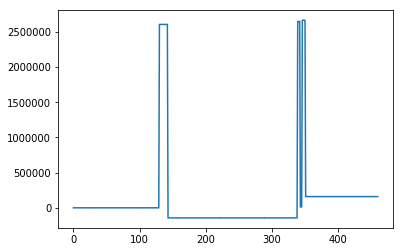

In [12]:
for i in range(s):
    pro = 0

    if(Data['VIX'][i]>= thresh and (not buy_flag)):
        order_details = [-1, "Buy", "0", "Position Taken"]
        buy_flag = True
        Sell_flag = False
        v = Data['future'][i]

    elif(Data['future'][i] >= (c_1) * v and (not Sell_flag)):
        buy_flag = False
        Sell_flag = True
        pro = (Data['future'][i] - v)
        order_details = [1, "Sell", "0", "Position Closed"]

    elif(Data['future'][i] <= (c_2)*v and (not Sell_flag)):
        buy_flag = False
        Sell_flag = True
        pro = (Data['future'][i] - v)
        order_details = [1, "Sell", "Stoploss Executed", "Position Closed"]

    else:
        if(buy_flag == 1 ):
            x = (Data['future'][i] - v) * 500 * 2
        else:
            x = "0"
        order_details = [0, "No Trade", "0", x]


    profit.append(pro)
    order.append(order_details[0])
    buy_sell.append(order_details[1])
    stoploss.append(order_details[2])
    mtm.append(order_details[3])

Data['placed_order'] = pd.Series(order)  # Converting list into Panda Series
Data['cost'] = - (Data['placed_order'].multiply(Data['future'])) * 500 * 2  #  Cost of each transaction
Data['out'] = Data['cost'].cumsum()   # Out is the cumulative cost profit / loss after transaction till now
Data['buy_sell'] = pd.Series(buy_sell)
Data['profit'] = -pd.Series(profit) * 500 * 2
Data['stoploss'] = pd.Series(stoploss)
Data['mtm'] = pd.Series(mtm)

print(Data['out'])

output = pd.DataFrame() # Final output to be stored in excel file
output['date'] = Data['Date']
output['Close'] = Data['future']
output['VIX'] = Data['VIX']
output['placed_order'] = Data['placed_order']
output['buy_sell'] = Data['buy_sell']
output['Profit'] = Data['profit']
output['mtm'] = Data['mtm']
output['stoploss'] = Data['stoploss']

output.to_excel('VIX_SL_output.xlsx', sheet_name='Sheet1')

plt.plot(Data['out'])
plt.show()